In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file, output_notebook
output_notebook()
from bokeh.io import export_png, save, export_svgs
%matplotlib inline

Loading BokehJS ...

In [2]:
datos = pd.read_csv("./data/all_counts_9_norm_rpkm.csv", index_col=0, usecols=["gene", "BB9", "BB10", "BB17",
                                                                              "BB19", "BB20", "BB21",
                                                                              "BB11", "BB12", "BB18"])
print("Tamanho dos dados:", datos.shape)
datos.head()

Tamanho dos dados: (4293, 9)


,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,45.6132,57.7381,35.4817,71.4413,75.5846,59.6099,93.7032,78.2685,75.4577
aaeB,48.4527,42.2968,41.1391,44.0555,47.6292,51.5953,56.3065,69.1718,58.5695
aaeR,49.0572,53.1486,33.4681,55.6848,43.8708,64.5169,51.3741,77.9266,79043.0000
aaeX,66.7322,64.9632,64.3814,81.0705,52586.0000,69.0053,64.9201,69.2443,56966.0000
aas,73.7846,77.6379,77.6300,65.1203,64.7268,77.6184,77.5343,95.9067,93.9019


In [3]:
datos

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,45.6132,57.7381,35.4817,71.4413,75.5846,59.6099,93.7032,78.2685,75.4577
aaeB,48.4527,42.2968,41.1391,44.0555,47.6292,51.5953,56.3065,69.1718,58.5695
aaeR,49.0572,53.1486,33.4681,55.6848,43.8708,64.5169,51.3741,77.9266,79043.0000
aaeX,66.7322,64.9632,64.3814,81.0705,52586.0000,69.0053,64.9201,69.2443,56966.0000
aas,73.7846,77.6379,77.6300,65.1203,64.7268,77.6184,77.5343,95.9067,93.9019
...,...,...,...,...,...,...,...,...,...
zraR,35.4703,24.4186,23.7445,26.4566,33.6869,42.3778,38.6865,48.7258,38.8266
zraS,43.5567,29.8736,33.9754,41.5843,33.4615,44.0745,62356.0000,53.2674,43.9796
zupT,191.5700,206206.0000,257553.0000,250797.0000,250387.0000,189776.0000,185402.0000,129102.0000,185584.0000


###  genes não expresos

In [4]:
g_nex = datos[np.sum(datos,axis=1)==0].index
print(len(g_nex))
datos = datos.drop(g_nex)
datos.shape

85


(4191, 9)

### Logaritmo dos dados
- Devido à que os dados apresentam muita variação, eles são levados a $log_{2}(features + 1)$.

In [5]:
datos = np.log2(datos + 1)
datos.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,5.542667,5.876225,5.189101,6.178741,6.258982,5.921482,6.565341,6.308676,6.256590
aaeB,5.627977,5.436188,5.397088,5.493631,5.603751,5.716862,5.840627,6.132819,5.896502
aaeR,5.645506,5.758852,5.107190,5.824890,5.487705,6.033795,5.710782,6.302440,16.270368
aaeX,6.081770,6.043589,6.030808,6.358792,15.682419,6.129392,6.042647,6.134309,15.797839
aas,6.224669,6.297153,6.297008,6.047021,6.038410,6.296795,6.295251,6.598525,6.568365


In [6]:
ob_rg = open("data/reference_genes.txt")
rg = [g for g in ob_rg.read().splitlines()]
print("quantidade de genes de referência:", len(rg))
print(rg)

quantidade de genes de referência: 21
['cysG', 'hcaT', 'idnT', 'rrsA', 'ihfB', 'ssrA', 'gyrA', 'recA', 'rpoB', 'rpoA', 'gyrB', 'rho', 'ftsZ', 'secA', 'rpoC', 'gmk', 'adk', 'rpoD', 'dnaG', 'glnA', 'recF']


### Coeficiente de variação (CV)
- para todos os genes é calculado o cv para poder ver quais genes tem um comportamento diferente aos demais.

In [7]:
cv_datos = {}
for idx, val in datos.iterrows():
    cv_datos[idx] = np.std(val)/np.mean(val)

In [8]:
cv_datos

{'aaeA': 0.06716444396906789,
 'aaeB': 0.03985792212663754,
 'aaeR': 0.4817197706501307,
 'aaeX': 0.48472544908114457,
 'aas': 0.028957179494625267,
 'aat': 0.49292703053551534,
 'abgA': 0.06171427183919567,
 'abgB': 0.5290464870726316,
 'abgR': 0.040210425507278866,
 'abgT': 0.45951902641491066,
 'abrB': 0.5086056086886258,
 'accA': 0.2985765597092678,
 'accB': 0.1741180780621409,
 'accC': 0.24271478698121746,
 'accD': 0.47364539893386437,
 'aceA': 0.44248950514945123,
 'aceB': 0.20505112735782846,
 'aceE': 0.042446284086516746,
 'aceF': 0.35093981582600103,
 'aceK': 0.41259223693092767,
 'ackA': 0.44038650559559156,
 'acnA': 0.5207456507301568,
 'acnB': 0.27797833699718155,
 'acpH': 0.4581137350546576,
 'acpP': 0.053397445560410324,
 'acpS': 0.5505524017245557,
 'acpT': 0.34903238547381954,
 'acrA': 0.28745597250919236,
 'acrB': 0.42426934346526385,
 'acrD': 0.02916318439365269,
 'acrE': 0.5981666655137879,
 'acrF': 0.481402951712661,
 'acrR': 0.18428101507385955,
 'acrS': 0.52895955

In [9]:
nan_list = []
for kv in cv_datos.items():
    if np.isnan(kv[1]):
        nan_list.append(kv[0])
print("número de valores nan: ", len(nan_list))

número de valores nan:  0


In [10]:
print(len(cv_datos))
for i in nan_list:
    del cv_datos[i]
print(len(cv_datos))

4191
4191


In [11]:
rg_cvvals = [cv_datos[i] for i  in rg]
rg_q25 = np.quantile(rg_cvvals, q=.25, interpolation="midpoint")
rg_q50 = np.quantile(rg_cvvals, q=.5, interpolation="midpoint")
rg_q75 = np.quantile(rg_cvvals, q=.75, interpolation="midpoint")
rg_upper = rg_q75 + 1.5*(rg_q75-rg_q25)
rg_lower = rg_q25 - 1.5*(rg_q75-rg_q25)

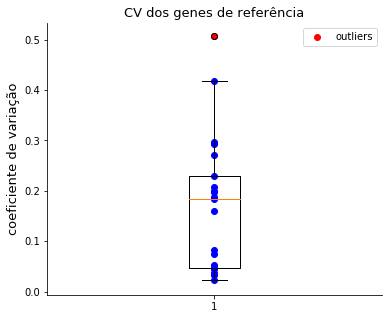

In [12]:
fig1 = plt.figure(figsize=(6,5))
i = 0
ax1 = fig1.add_subplot()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.title("CV dos genes de referência", fontsize=13)
plt.ylabel("coeficiente de variação", fontsize=13)
for gene in rg:
    if cv_datos[gene] <= rg_upper and cv_datos[gene] >= rg_lower:
        plt.scatter(1, cv_datos[gene], color="blue");
    else:
        plt.scatter(1, cv_datos[gene], color="red", label="outliers");
    i += 1
plt.boxplot(rg_cvvals, whis=1.5);
plt.legend();

In [13]:
lg_drop = []
print("max cv: ", rg_upper)
print("------------ outliers -------------")
for gene in rg:
    if cv_datos[gene] > rg_upper or cv_datos[gene] < rg_lower:
        lg_drop.append(gene)
        print("gene:", gene, "cv:", cv_datos[gene])


max cv:  0.5005366248219769
------------ outliers -------------
gene: idnT cv: 0.5082800362135752


In [14]:
a = np.array([-12, -1, 0 , 2, 5])

In [15]:
a[a<0] = 0 

In [16]:
def boxtplot_values(v):
    """
    return the values to plot a boxplot with ouliers
    """
    q25 = np.quantile(v, q=.25, interpolation="midpoint")
    q50 = np.quantile(v, q=.5, interpolation="midpoint")
    q75 = np.quantile(v, q=.75, interpolation="midpoint")
    lower = q25 - 1.5*(q75-q25)
    if lower<0: lower=0
    upper = q75 + 1.5*(q75-q25)
    #outliers
    outliers = v[(v<lower)|(v>upper)]
    
    return [lower, q25, q50, q75, upper], outliers

In [17]:
nc_cvvals = {}
for i  in cv_datos.keys():
    if i not in rg:
        nc_cvvals[i] = cv_datos[i]

In [18]:
len(nc_cvvals), len(cv_datos)

(4170, 4191)

In [19]:
rg, "idnT"

(['cysG',
  'hcaT',
  'idnT',
  'rrsA',
  'ihfB',
  'ssrA',
  'gyrA',
  'recA',
  'rpoB',
  'rpoA',
  'gyrB',
  'rho',
  'ftsZ',
  'secA',
  'rpoC',
  'gmk',
  'adk',
  'rpoD',
  'dnaG',
  'glnA',
  'recF'],
 'idnT')

In [20]:
nc_vals = [i for i in nc_cvvals.values()]
nc_q25 = np.quantile(nc_vals, q=.25, interpolation="midpoint")
nc_q50 = np.quantile(nc_vals, q=.5, interpolation="midpoint")
nc_q75 = np.quantile(nc_vals, q=.75, interpolation="midpoint")
nc_upper = nc_q75 + 1.5*(nc_q75-nc_q25)
nc_lower = nc_q25 - 1.5*(nc_q75-nc_q25)

In [23]:
[rgl,rgq1,rgq2,rgq3,rgu], rgouts = boxtplot_values(np.array(rg_cvvals))
[cl,cq1,cq2,cq3,cu], couts = boxtplot_values(np.array(nc_vals))

cats = ["Reference Genes", "Unclassified genes"]
p = figure(tools="", background_fill_color="#ffffff", x_range=cats, toolbar_location=None,
          plot_height=200, plot_width=280)


p.segment(cats, [rgq3,cq3], cats, [rgu,cu], line_color="black")
p.segment(cats, [rgl,cl], cats, [rgq1,cq1], line_color="black")
# boxes
p.vbar(cats, 0.3, [rgq2,cq2], [rgq3,cq3], fill_color="#E08E79", line_color="black")
p.vbar(cats, 0.3, [rgq1,cq1], [rgq2,cq2], fill_color="#3B8686", line_color="black")
# whiskers
p.rect(cats, [rgl,cl], 0.2, 0.0001, line_color="black")
p.rect(cats, [rgu,cu], 0.2, 0.0001, line_color="black")

p.circle([cats[0] for i in range(len(np.unique(rgouts)))], np.unique(rgouts),
         size=6, color="#F38630", fill_alpha=0.6)
p.circle([cats[1] for i in range(len(np.unique(couts)))], np.unique(couts),
         size=6, color="#F38630", fill_alpha=0.6, legend_label="outliers")
p.yaxis.axis_label = 'CV'
p.legend.location = "top_left"
p.xaxis.major_label_text_font_size = "14px"
p.yaxis.axis_label_text_font_size = "14px"
p.output_backend = "svg"
show(p)
#export_png(p, filename="./images/cv_boxplot.png")
export_svgs(p, filename="./images/cv_boxplot.svg")

['./images/cv_boxplot.svg']

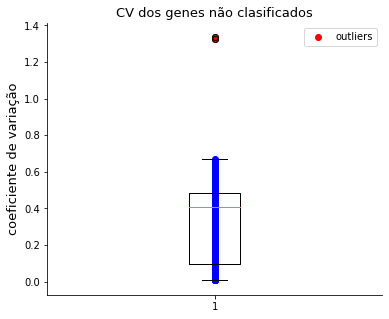

In [107]:
fig1 = plt.figure(figsize=(6,5))
i = 0
ax1 = fig1.add_subplot()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.title("CV dos genes não clasificados", fontsize=13)
plt.ylabel("coeficiente de variação", fontsize=13)

blue_list = []
red_list = []
for gene in nc_cvvals.keys():
    if nc_cvvals[gene] <= nc_upper and nc_cvvals[gene] >= nc_lower:
        blue_list.append(nc_cvvals[gene])
    else:
        red_list.append(nc_cvvals[gene])
        
plt.scatter(np.ones(len(blue_list)), blue_list, color="blue")
plt.scatter(np.ones(len(red_list)), red_list, color="red", label="outliers")
plt.boxplot(nc_vals, whis=1.5);
plt.legend();

In [108]:
print("max cv: ", nc_upper)
print("------------ outliers -------------")
for gene in nc_cvvals.keys():
    if nc_cvvals[gene] > nc_upper or nc_cvvals[gene] < nc_lower:
        lg_drop.append(gene)
        print("gene:", gene, "cv:", nc_cvvals[gene])


max cv:  1.0569477876922984
------------ outliers -------------
gene: rdlA cv: 1.3251462283761433
gene: rdlB cv: 1.3375069762730392


In [109]:
lg_drop

['idnT', 'rdlA', 'rdlB']

In [110]:
for g in lg_drop:
    del cv_datos[g]

In [111]:
print("quantidade de dados:", len(cv_datos))

quantidade de dados: 4188


In [112]:
len(cv_datos.keys())

4188

In [113]:
datos_p = datos.loc[cv_datos.keys()]
print(datos_p.shape, datos.shape)

(4188, 9) (4191, 9)


In [114]:
datos_p.to_csv("./data/all_counts_9_norm_rpkm_log2_preprocessed.csv")